*De La Salle University – Dasmariñas*\
*College of Information and Computer Studies*

*S–CSIS311LA — Introduction to Machine Learning (Laboratory)*

# Machine Learning: Support Vector Machine

__Name:__ Luis Anton P. Imperial\
__Course, Year & Section:__ BCS32\
__Date:__ Tuesday, October 29, 2024

## Learning Outcome:
1. Identify the key characteristics of the Labeled Faces in the Wild (LFW) dataset, including the number of people and the dimensions of images.
2. Understand the significance of splitting data into training and testing sets for model evaluation.
3. To implement the Support Vector Machine (SVM) algorithm to perform face classification tasks.
4. Interpret classification metrics (precision, recall, and F1-score) and visualize model performance using confusion matrices and incorrect predictions.
5. Identify and discuss the strengths and weaknesses of the SVM model in facial recognition based on experimental results.

## Direction:

Using Anaconda or Google Colab, solve the machine problem. Evaluate, analyze, and explain the steps using your chosen tool. Use the dataset LFW. After completing the solution, create two copies: one in PDF format and one in Python (.py) format. Submit both files.

Submit your answers to all 10 questions, along with relevant code snippets, graphs, and explanations. Additionally, reflect on how changes in parameters and kernels affected the SVM model’s performance.

## Task:
In this laboratory activity, you will begin by loading and exploring the dataset to understand its structure and characteristics. Next, you will visualize the images to observe variations in facial expressions, lighting, and other factors that might influence the classification task. After that, you
will proceed to split the data into training and testing sets to ensure a proper evaluation of the model’s performance.

Once the data is prepared, you will train the SVM model using the training set and then predict and visualize results by testing the model on the test data, highlighting correct and incorrect predictions. Following the predictions, you will evaluate the model using classification metrics and confusion matrices to assess its accuracy and performance.

Additionally, you will experiment with different parameters such as `min_faces_per_person` to see how the number of training images affects model performance. Finally, you will test different kernel functions in the SVM algorithm to determine which kernel yields the best results for this face recognition task.

## Code:

In [1]:
# Let's import the required libraries
from sklearn.datasets import fetch_lfw_people
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Let's fetch some data!

In [2]:
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


### Lets plot a few faces to see the data that we are dealing with

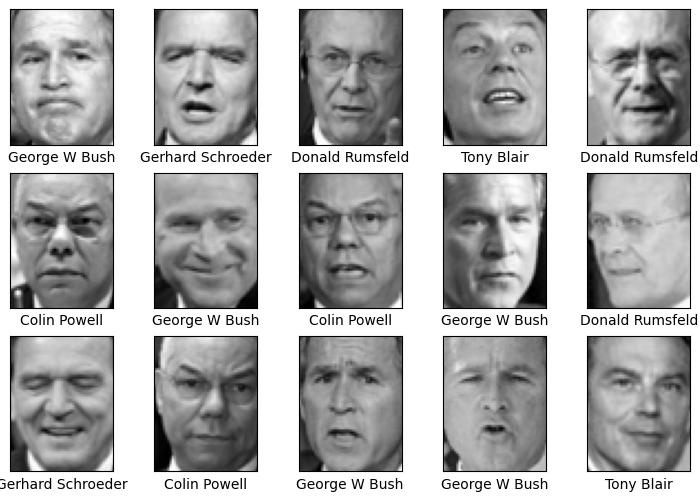

In [3]:
fig, ax = plt.subplots(3, 5)
fig = plt.gcf()
fig.set_size_inches(9,6)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### Step 2: Split the data into training and testing sets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                random_state=42)

### Step 3: Train the SVM model

In [5]:
from sklearn.svm import SVC

model = SVC(class_weight='balanced')
model.fit(X_train, y_train)

SVC(class_weight='balanced')

### Step 3½: Create other SVM models with tweaked parameters

Rather than sticking exclusively to the Support Vector Machine classifier provided to us by our instructor, I decided to create other models as well as import the LFW dataset with slightly different configuration settings.

This way, we can compare the provided model’s performance with those of these peers.

In [6]:
# Model 2: Different class_weight
model2 = SVC(class_weight='balanced', C=10)
model2.fit(X_train, y_train)

# Model 3: Using a higher min_faces_per_person (if data allows)
# Fetch LFW data with a higher min_faces_per_person
faces_high = fetch_lfw_people(min_faces_per_person=120)

# Check if there is enough data for this parameter setting
if len(faces_high.target_names) > 0 :
  X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(
      faces_high.data, faces_high.target, random_state=42
  )
  model3 = SVC(class_weight='balanced')
  model3.fit(X_train_high, y_train_high)
else:
    print("Not enough faces for min_faces_per_person = 120. Skipping model 3")
    model3 = None # Placeholder to indicate model3 was not created


# Model 4: Using a lower min_faces_per_person
faces_low = fetch_lfw_people(min_faces_per_person=50)
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(
    faces_low.data, faces_low.target, random_state=42
)
model4 = SVC(class_weight='balanced', kernel='linear')
model4.fit(X_train_low, y_train_low)

# Model 5: Different kernel and gamma parameter
model5 = SVC(kernel='rbf', gamma=0.001, class_weight='balanced')
model5.fit(X_train, y_train)

# Model 6: Using a polynomial kernel
model6 = SVC(kernel='poly', degree=3, coef0=1, C=5, class_weight='balanced')
model6.fit(X_train,y_train)

SVC(C=5, class_weight='balanced', coef0=1, kernel='poly')

### Step 4: Testing and Evaluating the predictions of the first model

In [7]:
yfit = model.predict(X_test)

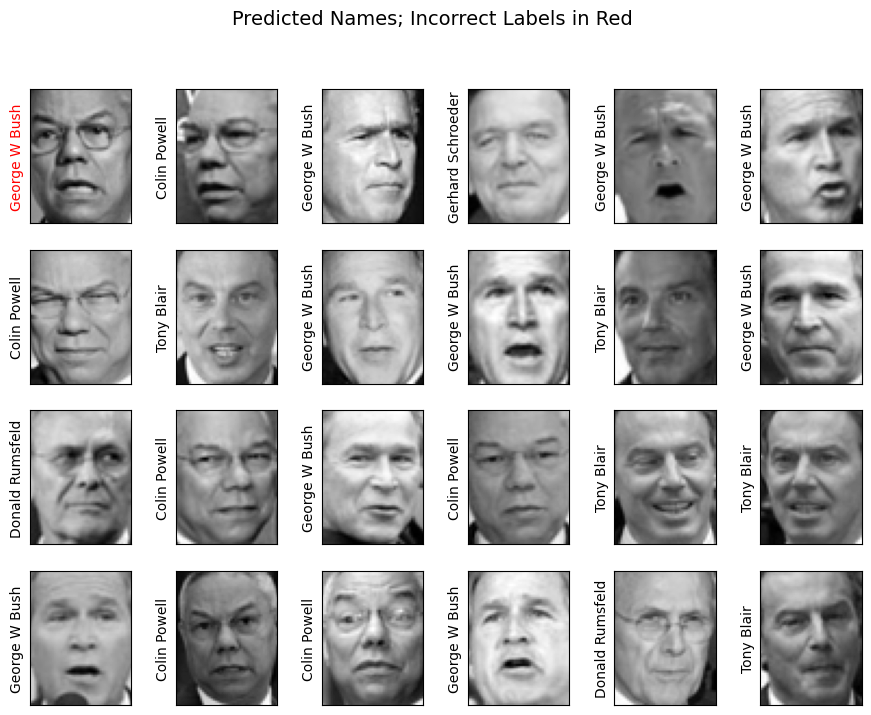

In [8]:
fig, ax = plt.subplots(4, 6)
fig = plt.gcf()
fig.set_size_inches(11,8)

for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]],
                   color='black' if yfit[i] == y_test[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [9]:
# Evaluating the model - Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.82      0.86      0.84        64
  Donald Rumsfeld       0.84      0.84      0.84        32
    George W Bush       0.88      0.89      0.88       127
Gerhard Schroeder       0.77      0.69      0.73        29
       Tony Blair       0.94      0.88      0.91        33

         accuracy                           0.86       285
        macro avg       0.85      0.83      0.84       285
     weighted avg       0.86      0.86      0.86       285



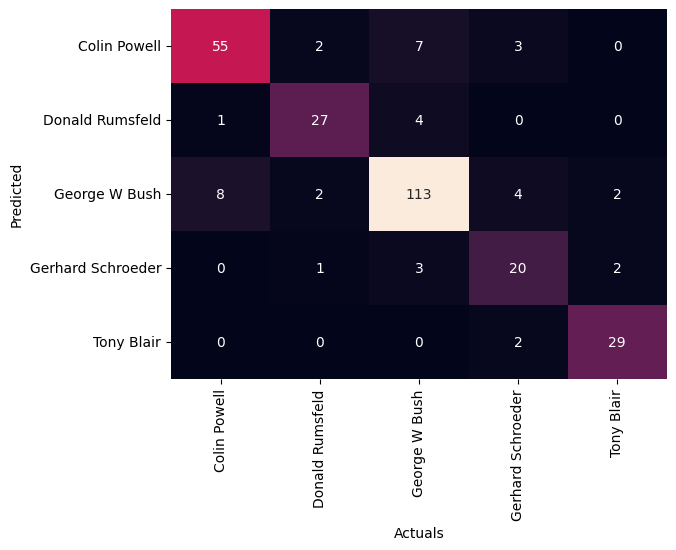

In [10]:
# Let's plot the confusion matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, yfit)

# Plotting the heatmap
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Actuals')
plt.ylabel('Predicted');

This helps us get a sense of which labels are likely to be confused by the estimator.

### Step 5: Compare our provided control model with our other models

While the base setup will be the SVC model initially created in Step 3, our experiments have different configurations meant to test whether those can improve the algorithm’s ability to classify faces.

In [19]:
from sklearn.metrics import classification_report

# Evaluate the initial model (model) - This part is already in the original code.
yfit = model.predict(X_test)
print("Classification Report for the Initial Model (model):")
print(classification_report(y_test, yfit, target_names=faces.target_names))


# Evaluate other models and compare to the initial model
models_to_evaluate = [
    (model2, X_train, y_train, X_test, y_test, "model2"),
    (model4, X_train_low, y_train_low, X_test_low, y_test_low, "model4"),
    (model5, X_train, y_train, X_test, y_test, "model5"),
    (model6, X_train, y_train, X_test, y_test, "model6")
]

if model3 is not None:  # Check if model3 was created successfully
    models_to_evaluate.append((model3, X_train_high, y_train_high, X_test_high, y_test_high, "model3"))

def evaluate_models(models_to_evaluate):
  for model_instance, X_train_data, y_train_data, X_test_data, y_test_data, model_name in models_to_evaluate:
      yfit_new = model_instance.predict(X_test_data)
      print(f"\nClassification Report for {model_name}:")

      # Use the correct target_names based on the dataset
      target_names_for_model = faces.target_names  # Default to the original faces dataset
      if model_name == "model3":
          target_names_for_model = faces_high.target_names
      elif model_name == "model4":
          target_names_for_model = faces_low.target_names

      print(classification_report(y_test_data, yfit_new, target_names=target_names_for_model))

evaluate_models(models_to_evaluate)

Classification Report for the Initial Model (model):
                   precision    recall  f1-score   support

     Colin Powell       0.82      0.86      0.84        64
  Donald Rumsfeld       0.84      0.84      0.84        32
    George W Bush       0.88      0.89      0.88       127
Gerhard Schroeder       0.77      0.69      0.73        29
       Tony Blair       0.94      0.88      0.91        33

         accuracy                           0.86       285
        macro avg       0.85      0.83      0.84       285
     weighted avg       0.86      0.86      0.86       285


Classification Report for model2:
                   precision    recall  f1-score   support

     Colin Powell       0.93      0.89      0.91        64
  Donald Rumsfeld       0.89      0.75      0.81        32
    George W Bush       0.85      0.95      0.90       127
Gerhard Schroeder       0.79      0.66      0.72        29
       Tony Blair       0.90      0.82      0.86        33

         accuracy     

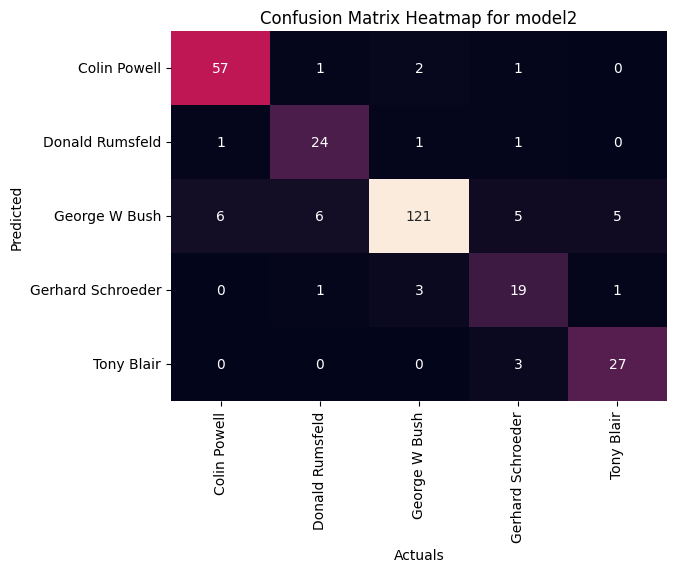

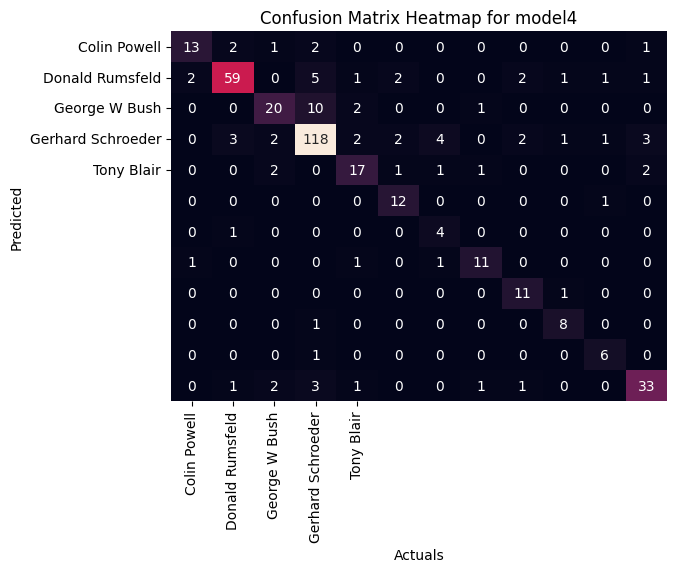

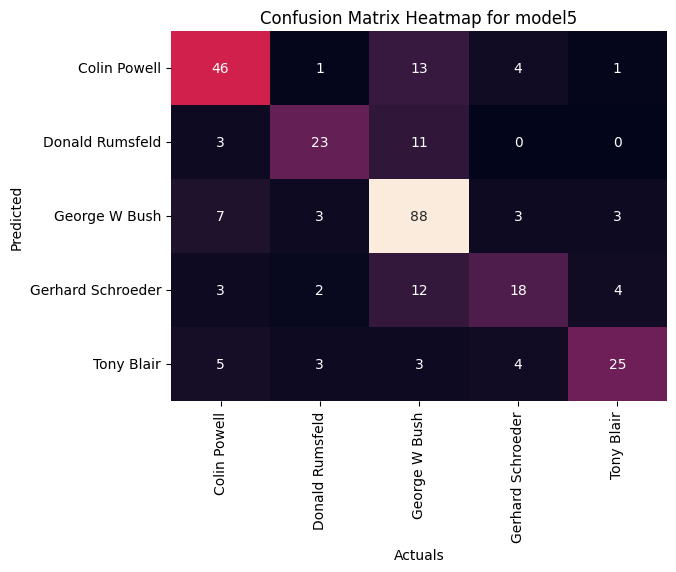

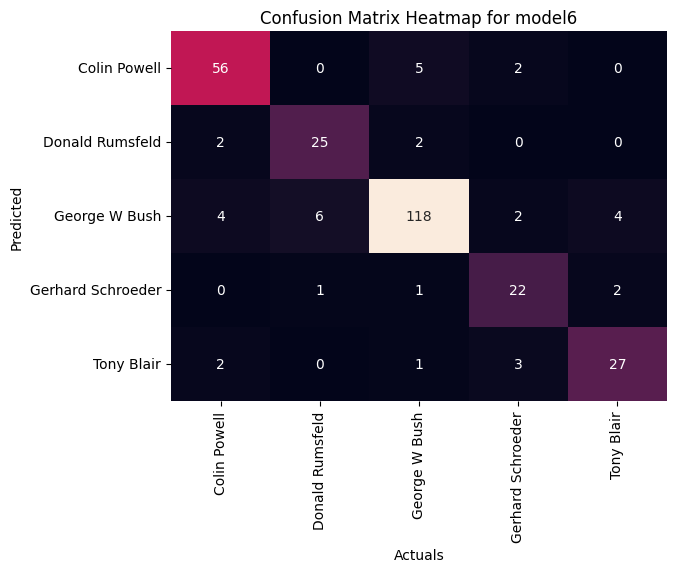

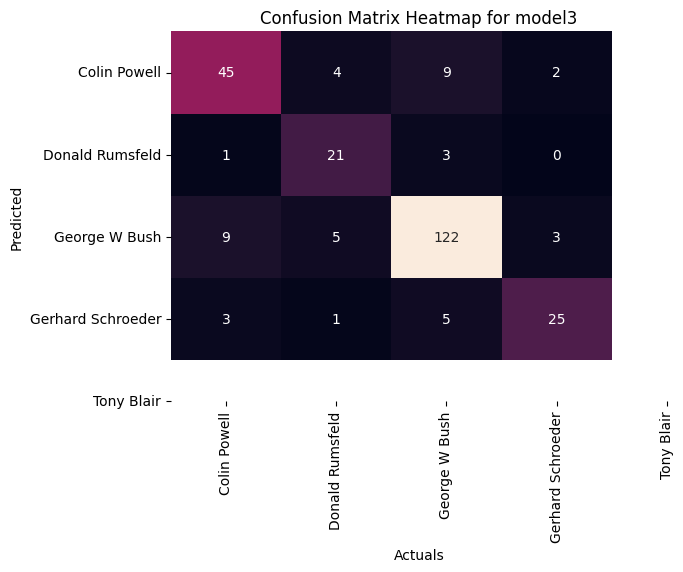

In [12]:
for model_instance, X_train_data, y_train_data, X_test_data, y_test_data, model_name in models_to_evaluate:
    yfit_new = model_instance.predict(X_test_data)
    conf_mat = confusion_matrix(y_test_data, yfit_new)

    plt.figure()  # Create a new figure for each heatmap
    sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False,
                xticklabels=faces.target_names,  # Use faces.target_names as default
                yticklabels=faces.target_names)
    plt.xlabel('Actuals')
    plt.ylabel('Predicted')
    plt.title(f'Confusion Matrix Heatmap for {model_name}') # Add title for clarity
    plt.show()

## Questions:

### Q1: How many different people are in the dataset?

There are **5 people** in the dataset that met the set criteria of `min_faces_per_person=100`.

In [13]:
print("Number of different people in the dataset:", len(faces.target_names))

Number of different people in the dataset: 5


However, if we lower that said criteria down to non-existent, we will discover that there are five thousand times more people than originally set.

There are **5,749** different people overall in the LFW dataset.

In [14]:
all_faces = fetch_lfw_people(min_faces_per_person=1)
print("Number of different people in the dataset:", len(all_faces.target_names))

Number of different people in the dataset: 5749


### Q2: What are the dimensions of each image in the dataset?

In the experimentation section (Step 1) of this notebook, we printed out the tuple `faces.images.shape`, requesting the “shape” of the images in the dataset.

In [15]:
print(faces.images.shape)

(1140, 62, 47)


With the provided setting of only including people with a minimum of 100 faces, we have 1,140 images with dimensions of **62 by 47 pixels** each.

### Q3: What are your observations about the variations in facial images (e.g., lighting, pose)?

I noticed that the facial images included differ in where the figures look as well as how bright or how dark the color mixing is overall. I believe this stems from the creators possibly sourcing these visuals from copyright-free and openly licensed images and videos set primarily in public spaces such as town hall meetings, campaign rallies and media interviews.

### Q4: Why is it important to split the data into training and testing sets?

Splitting the data into two different buckets allows us to analyze whether the classifier we’re studying actually performs to predict new data it would’ve already seen otherwise.



### Q5: What does the parameter class_weight='balanced' do in this context?

The class_weight parameter is used to address class imbalance in our dataset. Class imbalance occurs when one class has significantly more samples than another class.

(A certain “class” here means a person to which face images are being assigned.)

When we set `class_weight='balanced'`, the SVM algorithm automatically adjusts the weights inversely proportional to class frequencies in the input data. The more likely a class (a person) is, the less weight is given to them by the algo.

The model gives more importance to correctly classifying minority classes, which can improve overall performance, especially when dealing with imbalanced datasets.

#### Other options include:

- `None` (default). This means all classes are given equal weight.
- Dictionary. For each class level, we can assign a weight for this.

### Q6: How does the model’s performance look based on the visualization? What can you infer from the incorrect predictions (marked in red)?

The model performed exceptionally! In a visualization conducted with a subplot of 4 rows by 6 columns, the dataset was shown to have been classified correctly in all instances of each class, bar one.

Additionally, when plotted as a confusion matrix, a broader examination of the model showed it accurately labeling the vast majority of face images, with the heatmap concentrated on the class with the highest number of faces built-in (i.e. those of United States ex-President George W. Bush).

### Q7: What do precision, recall, and F1-score mean in the context of this model?

Precision refers to the number of True Positives the model has gotten compared to the overall number of Positives it received. In this context, a positive is when a face is identified with a certain person (for example, G.W. Bush), with a true positive being a correct identification and a false positive being a misidentification of that image as Bush.

Meanwhiile, recall is about examining the false negatives. TP/(TP+FN), so whenever an image of Bush is misclassified as not Bush, that is a false negative.

F-1 score harmonizes precision and recall as a balanced measure.

### Q8: Which person(s) does the model classify most accurately? Which person(s) does it struggle to classify?

Former United Kingdom Prime Minister Tony Blair received an F-1 score of 91%, making him the easiest to identify out of the selected group of persons in the LFW dataset.

Meanwhile, former German Chancellor Gerhard Schroeder received the lowest F-1 score at 77%.

These are the results for the first model. Result may vary based on the configuration settings of each model, and they did vary in our experiments.

Model | Person with Lowest F1-Score | Lowest F1-Score | Person with Highest F1-Score | Highest F1-Score
---|---|---|---|---
Initial Model (`model`) | Gerhard Schroeder |	0.73 |	Tony Blair |	0.91
model2 (`C=10`) | Gerhard Schroeder | 0.72 |	Colin Powell |	0.91
model3 (`min_faces_per_person=120`) | Donald Rumsfeld | 0.75 | George W. Bush | 0.88
model4 (`min_faces_per_person=50, kernel='linear'`) |	Jacques Chirac | 0.53 | George W. Bush | 0.85
model5 (`kernel='rbf', gamma=0.001`) | Gerhard Schroeder | 0.53 | George W. Bush | 0.76
model6 (`kernel='poly', degree=3, coef0=1, C=5`) | Gerhard Schroeder | 0.80 |	George W. Bush | 0.90

### Q9: Try changing the min_faces_per_person parameter to see how the model's performance changes with different numbers of images.

`model3` had a higher value of `120` for the setting, which meant that only people with at least 120 face images assigned to them in the dataset would be included in the model’s training.

Unfortunately, `model3` performed worse in every aspect, most visibly seen in Donald Rumsfeld's recall falling from 84% to 68%, as well as the massive decline in Tony Blair's precision from 94% to just 74%.

Additionally, this could make the model less scalable for future use, as the limited dataset could fail to capture unseen faces when provided.

In [20]:
models_to_evaluate = [
    (model, X_train, y_train, X_test, y_test, "model"),
    (model3, X_train_high, y_train_high, X_test_high, y_test_high, "model3")
]

evaluate_models(models_to_evaluate)


Classification Report for model:
                   precision    recall  f1-score   support

     Colin Powell       0.82      0.86      0.84        64
  Donald Rumsfeld       0.84      0.84      0.84        32
    George W Bush       0.88      0.89      0.88       127
Gerhard Schroeder       0.77      0.69      0.73        29
       Tony Blair       0.94      0.88      0.91        33

         accuracy                           0.86       285
        macro avg       0.85      0.83      0.84       285
     weighted avg       0.86      0.86      0.86       285


Classification Report for model3:
                 precision    recall  f1-score   support

   Colin Powell       0.75      0.78      0.76        58
Donald Rumsfeld       0.84      0.68      0.75        31
  George W Bush       0.88      0.88      0.88       139
     Tony Blair       0.74      0.83      0.78        30

       accuracy                           0.83       258
      macro avg       0.80      0.79      0.79       

In [21]:
models_to_evaluate = [
    (model, X_train, y_train, X_test, y_test, "model"),
    (model4, X_train_low, y_train_low, X_test_low, y_test_low, "model4")
]

evaluate_models(models_to_evaluate)


Classification Report for model:
                   precision    recall  f1-score   support

     Colin Powell       0.82      0.86      0.84        64
  Donald Rumsfeld       0.84      0.84      0.84        32
    George W Bush       0.88      0.89      0.88       127
Gerhard Schroeder       0.77      0.69      0.73        29
       Tony Blair       0.94      0.88      0.91        33

         accuracy                           0.86       285
        macro avg       0.85      0.83      0.84       285
     weighted avg       0.86      0.86      0.86       285


Classification Report for model4:
                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.81      0.74        16
     Colin Powell       0.80      0.89      0.84        66
  Donald Rumsfeld       0.61      0.74      0.67        27
    George W Bush       0.86      0.84      0.85       140
Gerhard Schroeder       0.71      0.71      0.71        24
      Hugo Chavez       0.92      0.71    

`model4` had a lower value, opening up the barriers as the quota to be allowed into the training and testing sets was brought down to `50`.

Sadly, it performed worse, with accuracy going down faster than the previous model. With a mere 80% accuracy score and a minimum F-1 score of just 53%, it is clear that this model fails to provide enough data for a classifier to train with.

### Q10: Experiment with different SVM kernel functions (e.g., 'linear', 'poly', 'rbf') and compare the results

In [22]:
models_to_evaluate = [
    (model, X_train, y_train, X_test, y_test, "model"),
    (model4, X_train_low, y_train_low, X_test_low, y_test_low, "model4"),
    (model5, X_train, y_train, X_test, y_test, "model5"),
    (model6, X_train, y_train, X_test, y_test, "model6")
]

evaluate_models(models_to_evaluate)


Classification Report for model:
                   precision    recall  f1-score   support

     Colin Powell       0.82      0.86      0.84        64
  Donald Rumsfeld       0.84      0.84      0.84        32
    George W Bush       0.88      0.89      0.88       127
Gerhard Schroeder       0.77      0.69      0.73        29
       Tony Blair       0.94      0.88      0.91        33

         accuracy                           0.86       285
        macro avg       0.85      0.83      0.84       285
     weighted avg       0.86      0.86      0.86       285


Classification Report for model4:
                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.81      0.74        16
     Colin Powell       0.80      0.89      0.84        66
  Donald Rumsfeld       0.61      0.74      0.67        27
    George W Bush       0.86      0.84      0.85       140
Gerhard Schroeder       0.71      0.71      0.71        24
      Hugo Chavez       0.92      0.71    

Model | Person with Lowest F1-Score | Lowest F1-Score | Person with Highest F1-Score | Highest F1-Score
---|---|---|---|---
Initial Model (`model`) | Gerhard Schroeder |	0.73 |	Tony Blair |	0.91
model4 (`min_faces_per_person=50, kernel='linear'`) |	Jacques Chirac | 0.53 | George W. Bush | 0.85
model5 (`kernel='rbf', gamma=0.001`) | Gerhard Schroeder | 0.53 | George W. Bush | 0.76
model6 (`kernel='poly', degree=3, coef0=1, C=5`) | Gerhard Schroeder | 0.80 |	George W. Bush | 0.90